In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Step 2: Load dataset
df = pd.read_csv('/content/HR-Employee-Attrition.csv')  # Replace with your file

# Drop irrelevant columns
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)  # Adjust columns if needed
y = df['Attrition']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# --- Changes start here ---
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for SMOTE compatibility
encoded_data = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
X = pd.concat([X.drop(categorical_features, axis=1), encoded_df], axis=1)
# --- Changes end here ---

# Step 3: Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Step 2: Load dataset
df = pd.read_csv('/content/HR-Employee-Attrition.csv')

# Drop irrelevant columns like 'EmployeeNumber'
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

# Encode target variable (Attrition)
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 3: Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Performance
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}')
print(f"Logistic Regression Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.6721
Logistic Regression Cohen's Kappa: 0.3451
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       250
           1       0.65      0.73      0.69       244

    accuracy                           0.67       494
   macro avg       0.68      0.67      0.67       494
weighted avg       0.68      0.67      0.67       494



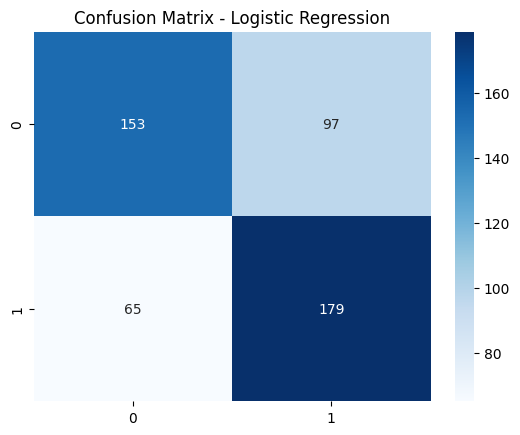

In [ ]:
# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

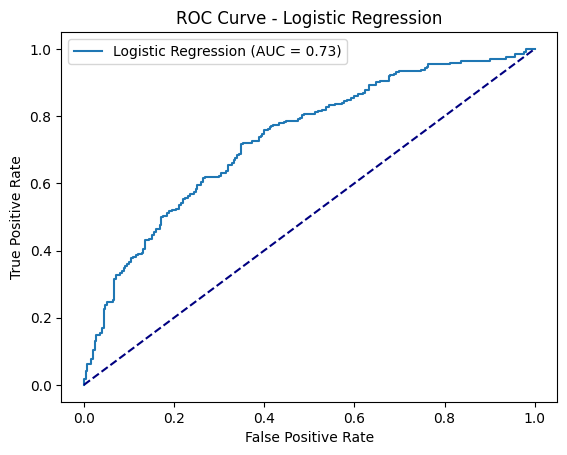

In [ ]:
# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
# Performance
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f"Random Forest Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9170
Random Forest Cohen's Kappa: 0.8338
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       250
           1       0.95      0.88      0.91       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



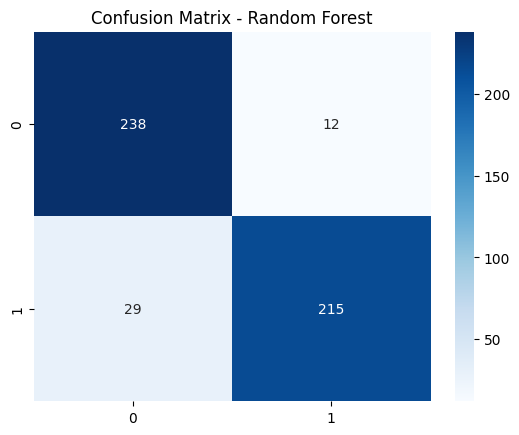

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

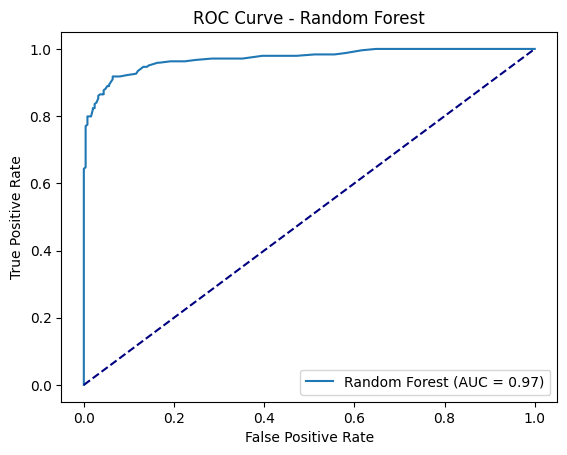

In [ ]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [ ]:
# Train SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Performance
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}')
print(f"SVM Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.5972
SVM Cohen's Kappa: 0.1962
              precision    recall  f1-score   support

           0       0.63      0.50      0.56       250
           1       0.58      0.70      0.63       244

    accuracy                           0.60       494
   macro avg       0.60      0.60      0.59       494
weighted avg       0.60      0.60      0.59       494



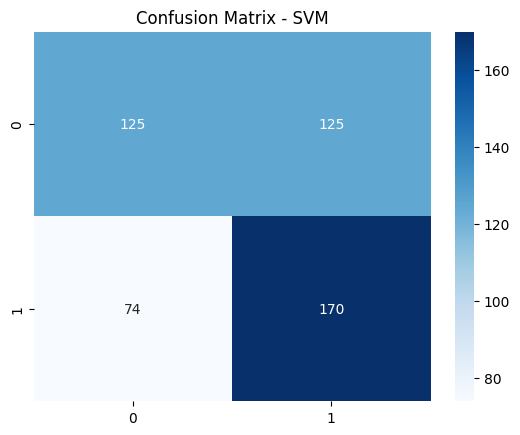

In [ ]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
# Train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Performance
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}')
print(f"KNN Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7652
KNN Cohen's Kappa: 0.5318
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       250
           1       0.71      0.90      0.79       244

    accuracy                           0.77       494
   macro avg       0.79      0.77      0.76       494
weighted avg       0.79      0.77      0.76       494



In [ ]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Performance
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}')
print(f"Gradient Boosting Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_gb):.4f}")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9069
Gradient Boosting Cohen's Kappa: 0.8136
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       250
           1       0.94      0.86      0.90       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



In [ ]:
# Import the MLP Classifier from sklearn
from sklearn.neural_network import MLPClassifier

# Step 1: Create an instance of the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ),  # Single hidden layer with 100 neurons (can adjust)
                          activation='relu',          # Activation function for hidden layer ('relu', 'tanh', etc.)
                          solver='adam',              # Solver for weight optimization ('adam', 'sgd', 'lbfgs')
                          max_iter=300,               # Maximum number of iterations
                          random_state=42)

# Step 2: Train the MLP model on the training data
mlp_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]  # For ROC Curve and AUC
# Step 5: Performance Metrics
print(f'MLP Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}')
print(f"MLP Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_mlp):.4f}")
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.5526
MLP Cohen's Kappa: 0.1137
              precision    recall  f1-score   support

           0       0.77      0.16      0.27       250
           1       0.53      0.95      0.68       244

    accuracy                           0.55       494
   macro avg       0.65      0.56      0.47       494
weighted avg       0.65      0.55      0.47       494



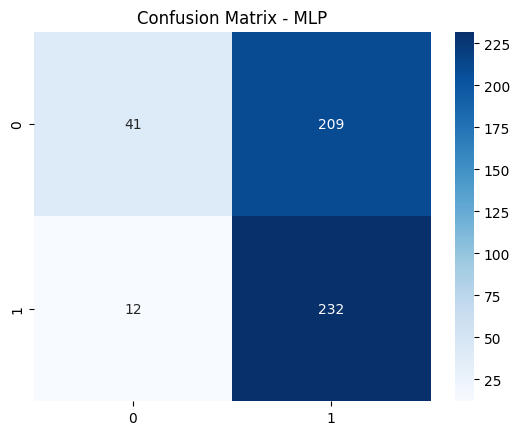

In [ ]:
# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLP')
plt.show()

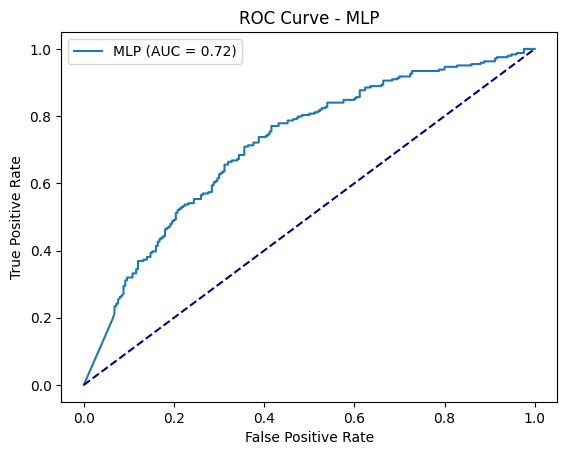

In [ ]:

# ROC Curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend()
plt.show()

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

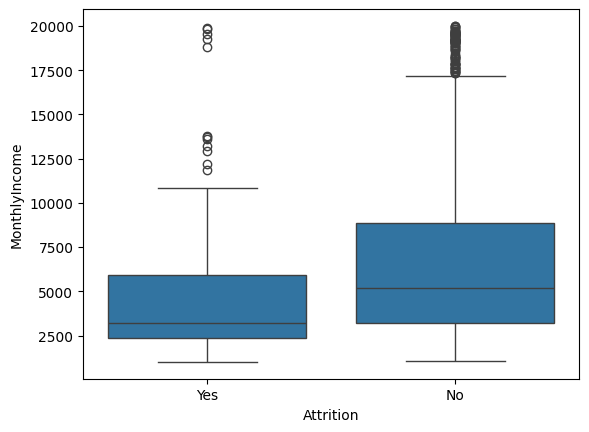

In [ ]:
# Step 8: Box plot for a feature by Attrition
#plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)


In [ ]:
# Check the first few rows
print(df.head())

# Check the shape of the DataFrame
print(f"DataFrame Shape: {df.shape}")

# Check the value counts of 'Attrition'
print(df['Attrition'].value_counts())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

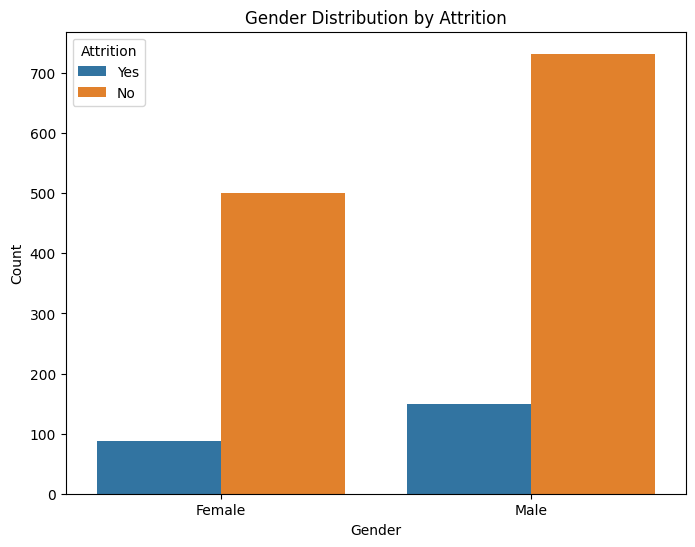

In [ ]:
# Bar Plot for Gender and Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Gender Distribution by Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

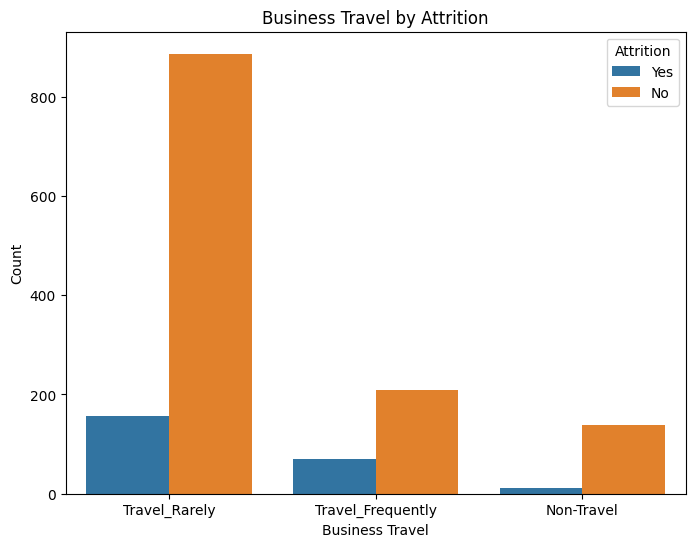

In [ ]:
# Bar Plot for BusinessTravel and Attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Business Travel by Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

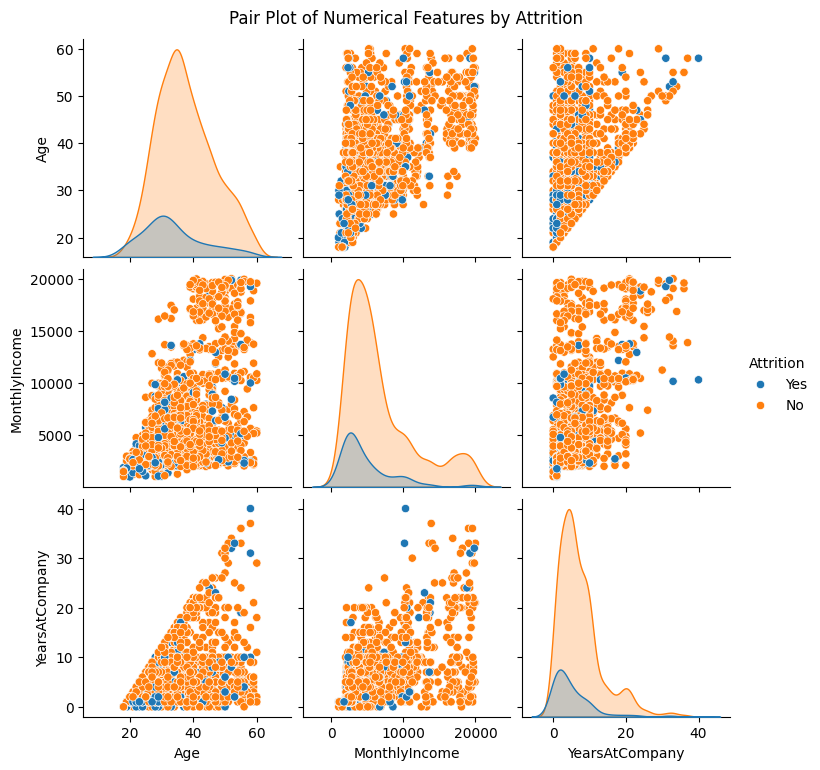

In [ ]:
sns.pairplot(df[['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition']], hue='Attrition', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Attrition', y=1.02)
plt.show()


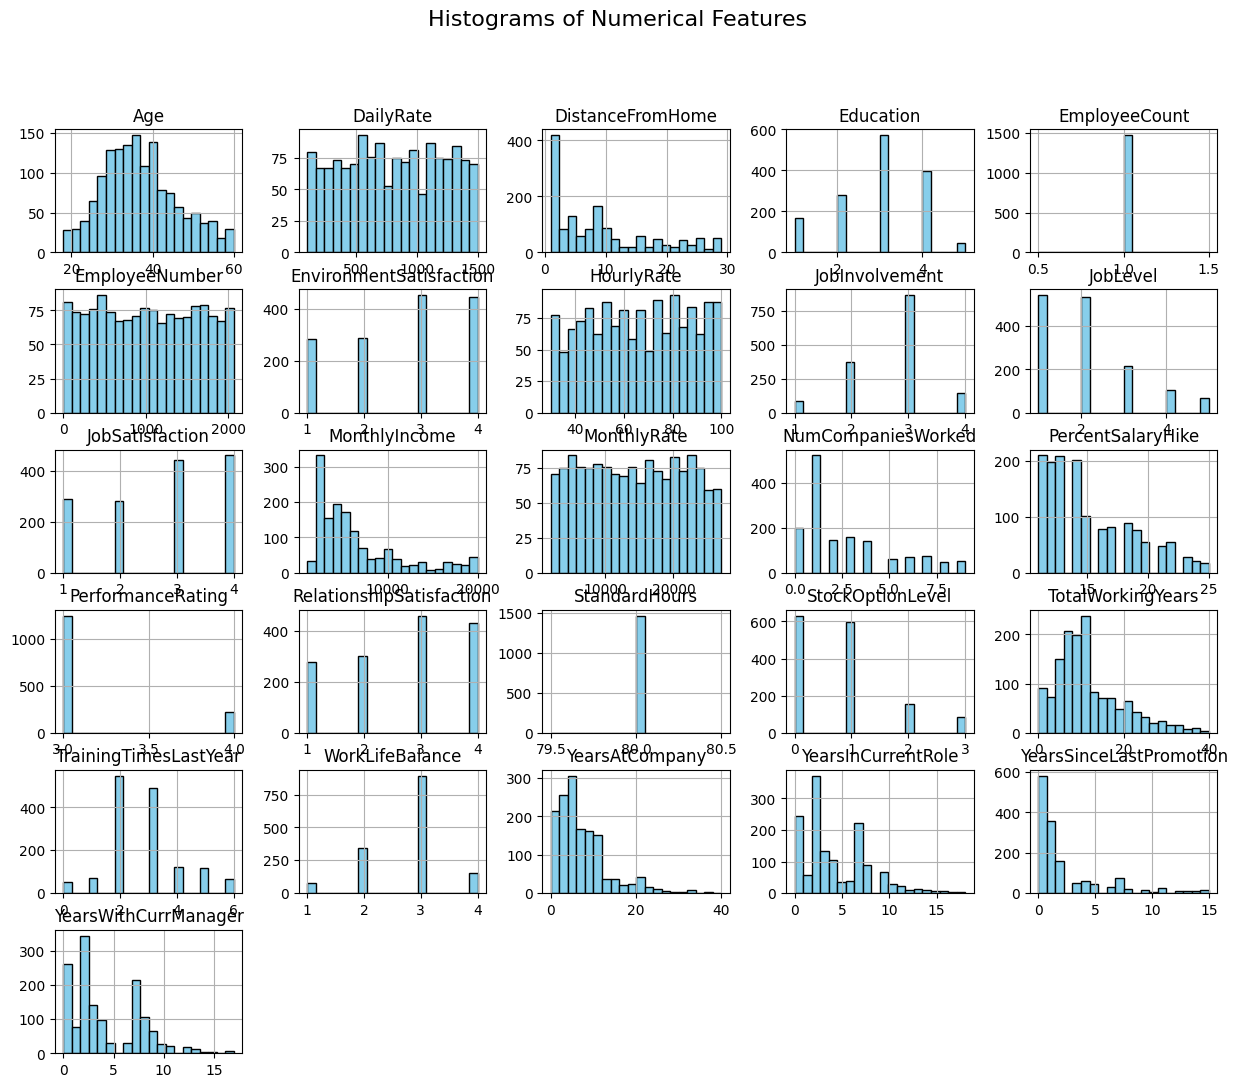

In [ ]:
# Step 1: Select numerical features
numerical_df = df.select_dtypes(include=[np.number])

# Step 2: Plot histograms for each numerical feature
numerical_df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


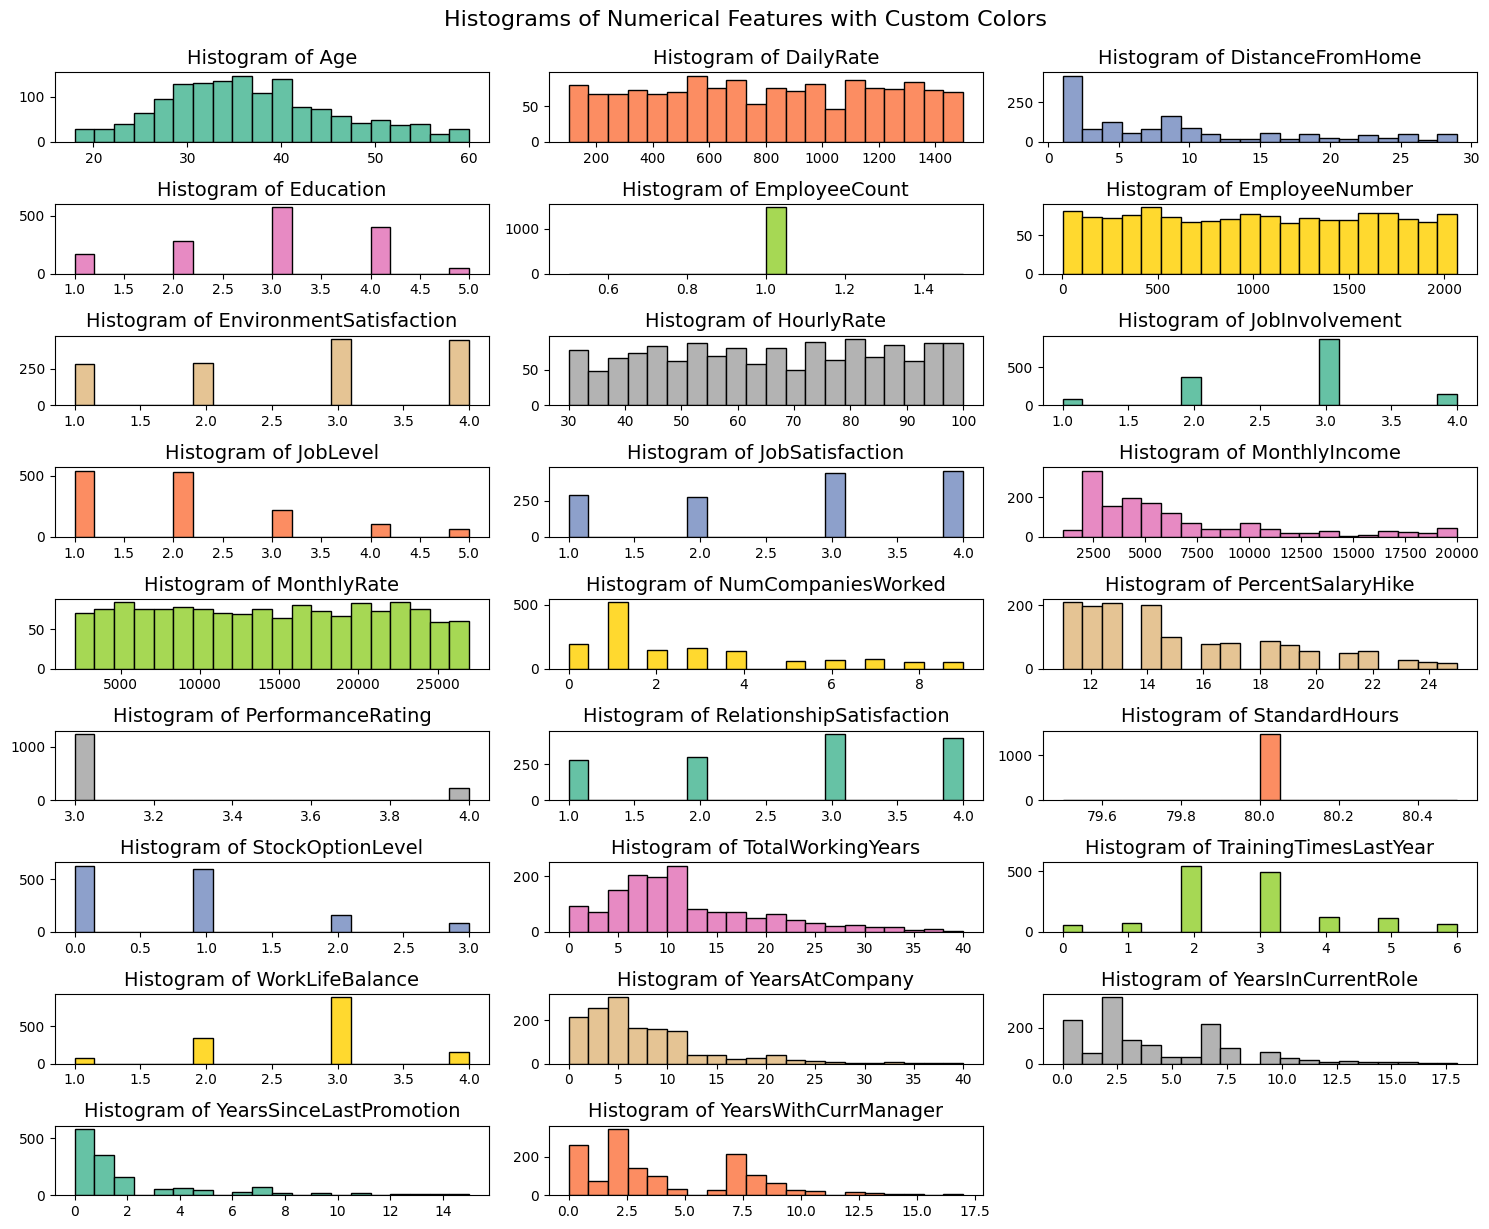

In [ ]:
# Step 1: Select numerical features
numerical_df = df.select_dtypes(include=[np.number])

# Step 2: Define a color palette for the histograms
colors = sns.color_palette("Set2", len(numerical_df.columns))  # Using 'Set2' for custom colors

# Step 3: Plot histograms for each numerical feature with a different color
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed
for i, column in enumerate(numerical_df.columns):
    plt.subplot(len(numerical_df.columns) // 3 + 1, 3, i+1)  # Create a grid layout for subplots
    plt.hist(numerical_df[column], bins=20, color=colors[i], edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.tight_layout()  # Adjust layout to avoid overlap

plt.suptitle('Histograms of Numerical Features with Custom Colors', fontsize=16, y=1.02)
plt.show()


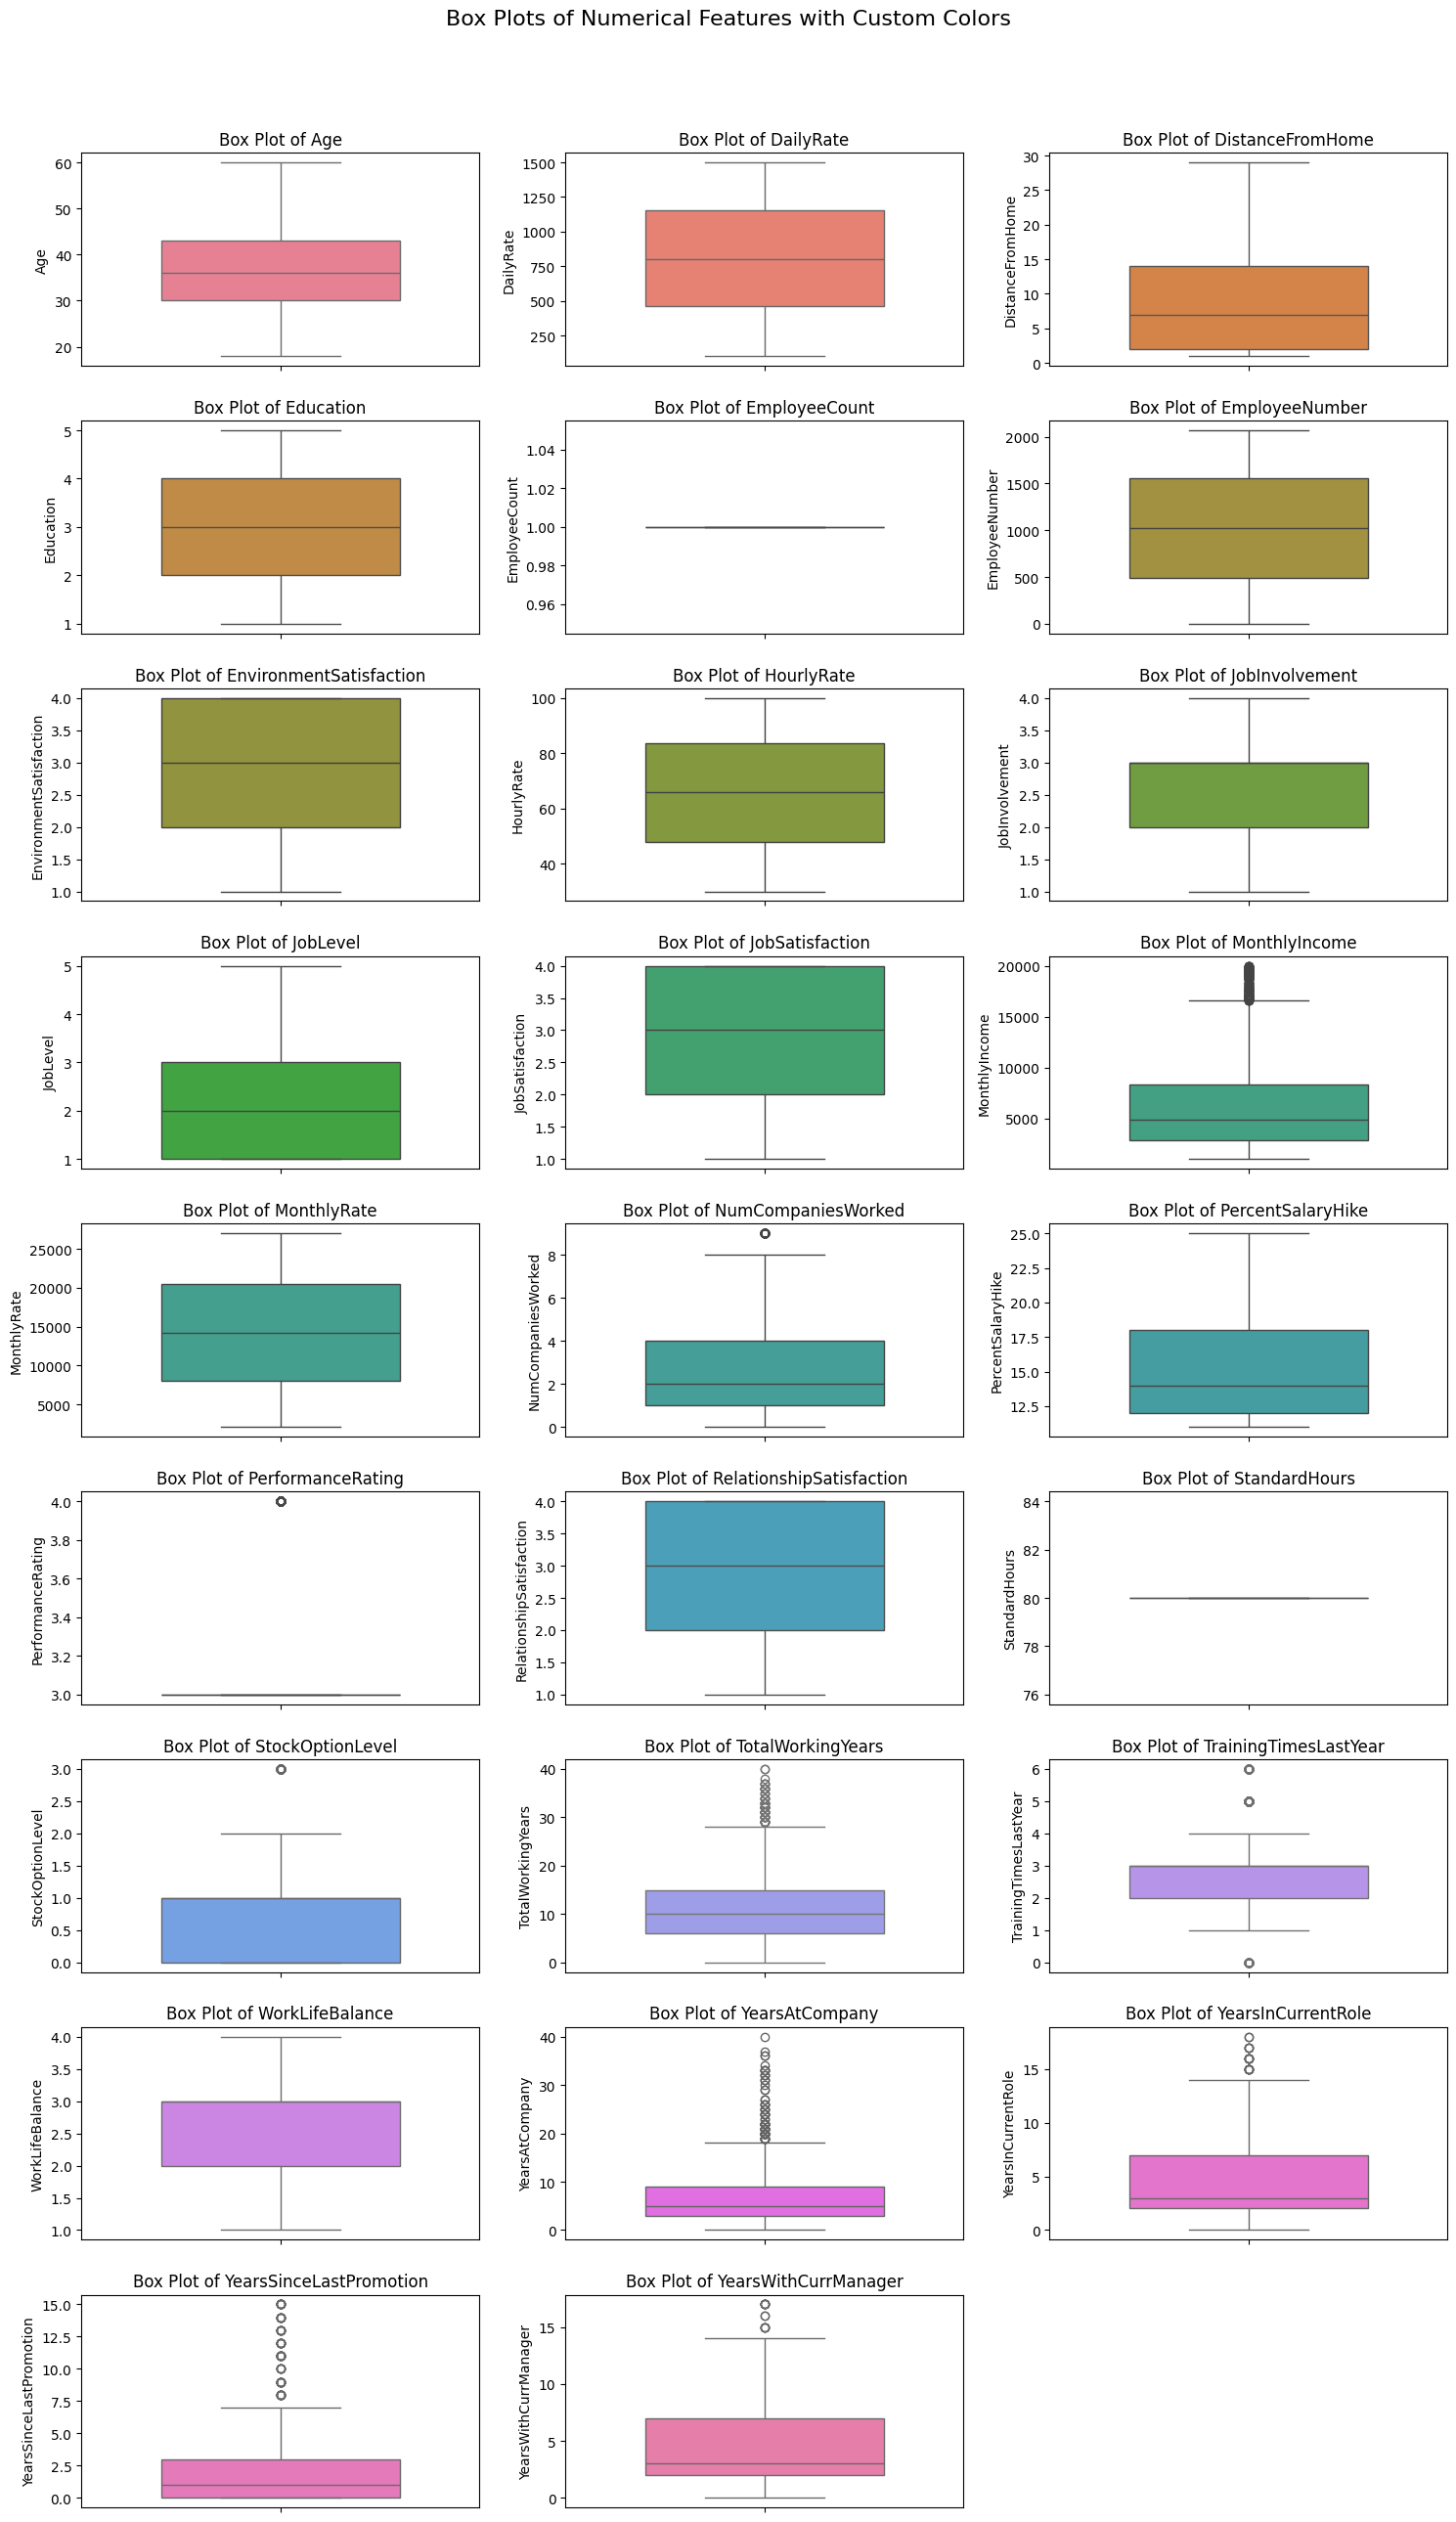

In [ ]:
# Step 1: Select numerical features
numerical_df = df.select_dtypes(include=[np.number])

# Step 2: Define custom color palette for the box plots
colors = sns.color_palette("husl", len(numerical_df.columns))  # Use 'husl' palette for vibrant colors

# Step 3: Create box plots for each numerical feature
plt.figure(figsize=(15, 25))  # Adjust the figure size as needed
for i, column in enumerate(numerical_df.columns):
    plt.subplot(len(numerical_df.columns) // 3 + 1, 3, i + 1)  # Create grid layout with 3 columns per row
    sns.boxplot(data=df, y=column, color=colors[i], width=0.6)  # Custom color for each feature
    plt.title(f'Box Plot of {column}', fontsize=12)  # Add title for each box plot
    plt.xlabel('')  # Hide x-axis label (optional)
    plt.ylabel(column, fontsize=10)  # Label the y-axis

plt.suptitle('Box Plots of Numerical Features with Custom Colors', fontsize=16, y=1.03)
plt.tight_layout(h_pad=2.0)  # Adjust layout to avoid overlapping of titles
plt.show()


                     Accuracy Cohen's Kappa       AUC
Logistic Regression  0.672065      0.345064  0.732033
Random Forest        0.917004      0.833845  0.971926
SVM                  0.597166      0.196229  0.633869
KNN                  0.765182      0.531815  0.846607
Gradient Boosting    0.906883      0.813554   0.95677
MLP                  0.552632      0.113718  0.716885


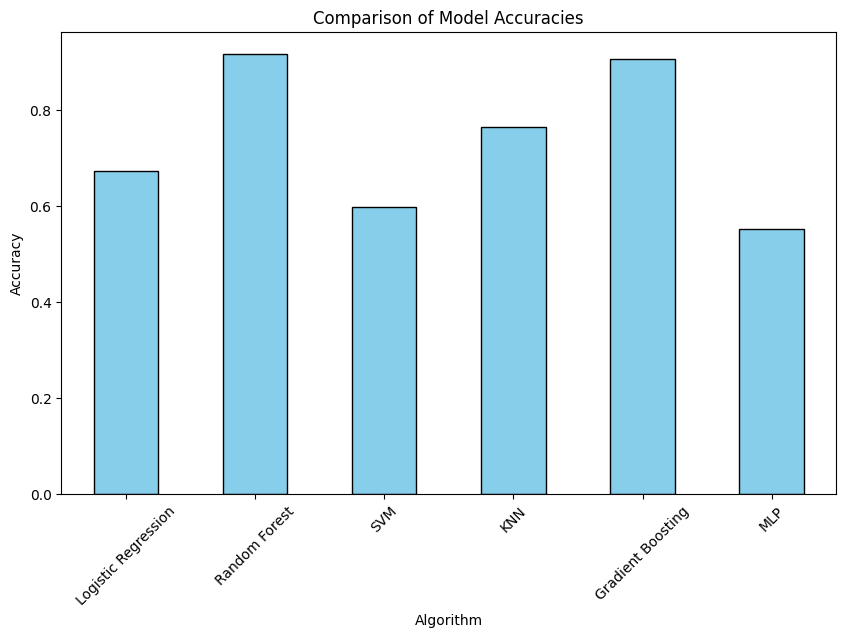

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report, auc

# Step 1: Initialize a results dictionary to store performance metrics for each algorithm
results = {}

# Step 2: Define a function to evaluate and store the results
def evaluate_model(model_name, y_test, y_pred, y_prob=None):
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        "Cohen's Kappa": kappa,
        'Classification Report': report,
    }

    # If probabilities are available, calculate AUC
    if y_prob is not None:
        auc_score = auc(*roc_curve(y_test, y_prob)[:2])
        results[model_name]['AUC'] = auc_score

# Step 3: Evaluate each model and store the results

# Logistic Regression
evaluate_model('Logistic Regression', y_test, y_pred_log, y_prob_log)

# Random Forest
evaluate_model('Random Forest', y_test, y_pred_rf, y_prob_rf)

# Support Vector Machine (SVM)
evaluate_model('SVM', y_test, y_pred_svm, y_prob_svm)

# K-Nearest Neighbors (KNN)
evaluate_model('KNN', y_test, y_pred_knn, y_prob_knn)

# Gradient Boosting
evaluate_model('Gradient Boosting', y_test, y_pred_gb, y_prob_gb)

# Multi-layer Perceptron (MLP)
evaluate_model('MLP', y_test, y_pred_mlp, y_prob_mlp)

# Step 4: Visualize the comparison in a table format (or simply print the results)
comparison_df = pd.DataFrame(results).T  # Transpose the results for better readability
comparison_df = comparison_df[['Accuracy', "Cohen's Kappa", 'AUC']]  # Include only relevant metrics

# Display the comparison table
print(comparison_df)

# Optionally, visualize the accuracy comparison
comparison_df['Accuracy'].plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.show()


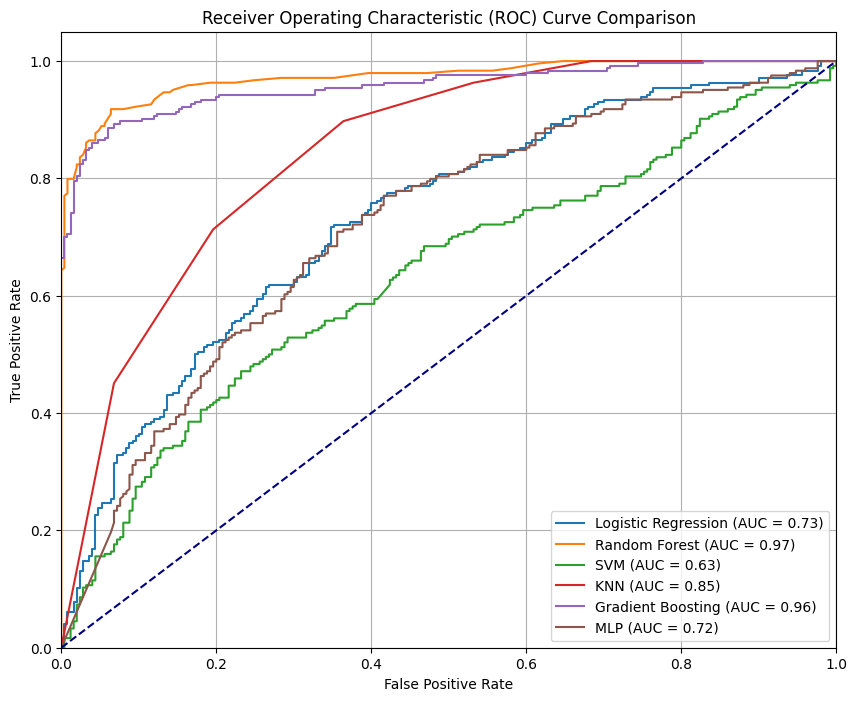

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 1: Initialize a results dictionary to store performance metrics for each algorithm
results = {}

# Step 2: Define a function to evaluate and store the results
def evaluate_model(model_name, y_test, y_pred, y_prob=None):
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        "Cohen's Kappa": kappa,
        'Classification Report': report,
    }

    # If probabilities are available, calculate AUC and ROC curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        results[model_name]['AUC'] = auc_score
        return fpr, tpr, auc_score  # Return fpr, tpr, and auc for plotting
    return None, None, None  # If no probabilities, return None

# Step 3: Evaluate each model and store the results for ROC plotting

# Create a plot for ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression
fpr_log, tpr_log, auc_log = evaluate_model('Logistic Regression', y_test, y_pred_log, y_prob_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')

# Random Forest
fpr_rf, tpr_rf, auc_rf = evaluate_model('Random Forest', y_test, y_pred_rf, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Support Vector Machine (SVM)
fpr_svm, tpr_svm, auc_svm = evaluate_model('SVM', y_test, y_pred_svm, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

# K-Nearest Neighbors (KNN)
fpr_knn, tpr_knn, auc_knn = evaluate_model('KNN', y_test, y_pred_knn, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')

# Gradient Boosting
fpr_gb, tpr_gb, auc_gb = evaluate_model('Gradient Boosting', y_test, y_pred_gb, y_prob_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')

# Multi-layer Perceptron (MLP)
fpr_mlp, tpr_mlp, auc_mlp = evaluate_model('MLP', y_test, y_pred_mlp, y_prob_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

# Step 4: Customize the plot
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


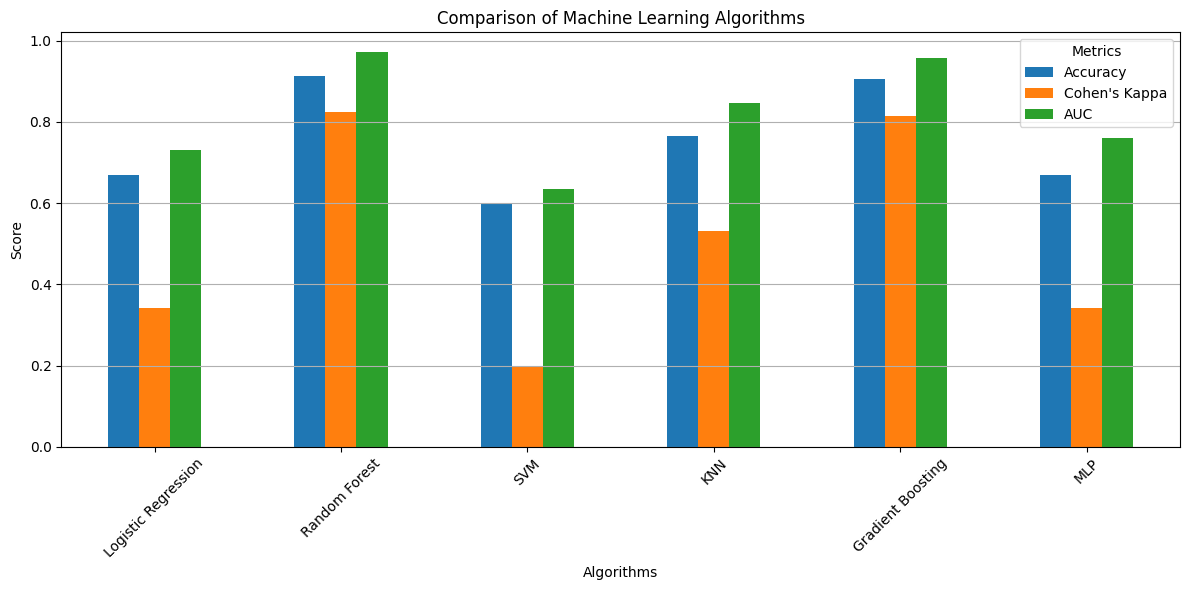

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Accuracy', "Cohen's Kappa", 'AUC']
values = {
    'Logistic Regression': [0.67004, 0.341053, 0.73223],
    'Random Forest': [0.912955, 0.825808, 0.972246],
    'SVM': [0.597166, 0.196229, 0.633738],
    'KNN': [0.765182, 0.531815, 0.846607],
    'Gradient Boosting': [0.906883, 0.813554, 0.956967],
    'MLP': [0.67004, 0.342602, 0.761115],
}

# Create a DataFrame for easier plotting
comparison_df = pd.DataFrame(values, index=metrics).T

# Plotting
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Machine Learning Algorithms')
plt.ylabel('Score')
plt.xlabel('Algorithms')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Grid Search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


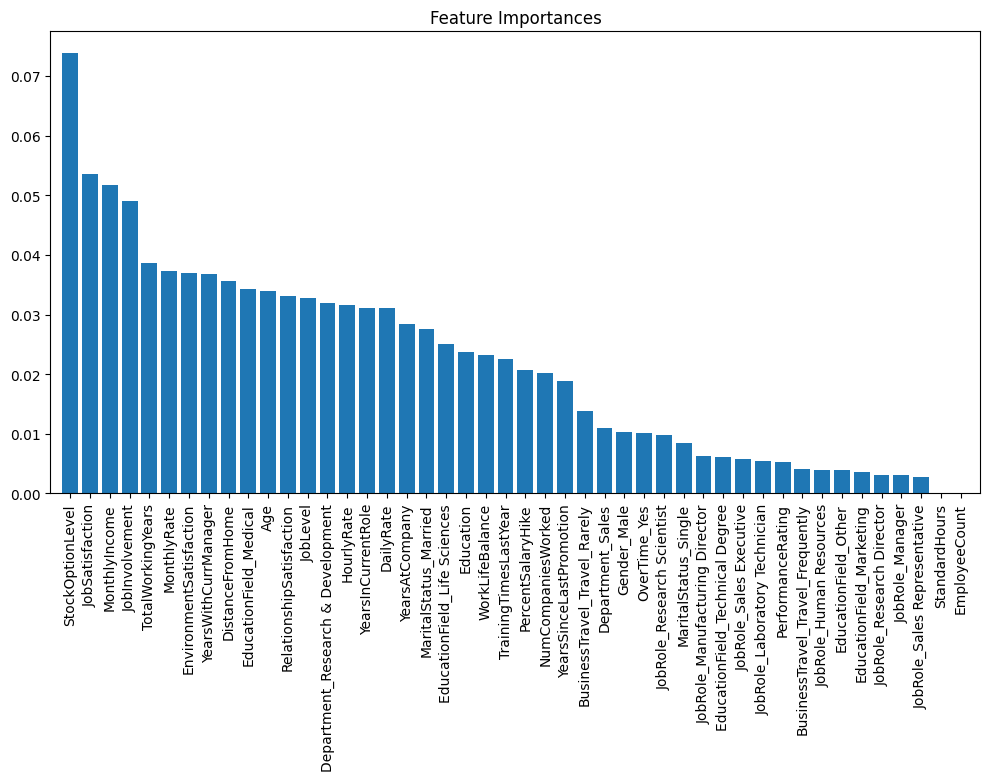

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validated scores:", scores)


Cross-validated scores: [0.8537415  0.85714286 0.86054422 0.85714286 0.86394558]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
y_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]


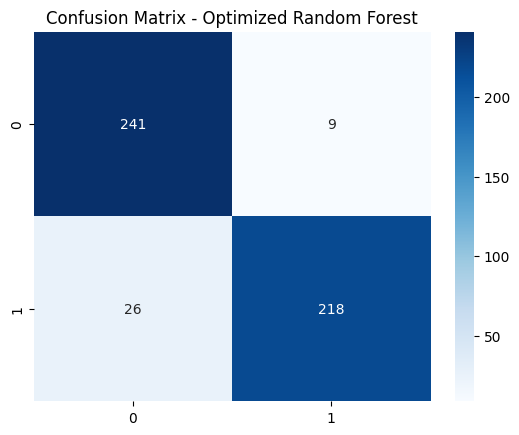

Optimized Random Forest Accuracy: 0.9291
Optimized Random Forest Cohen's Kappa: 0.8582
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       250
           1       0.96      0.89      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



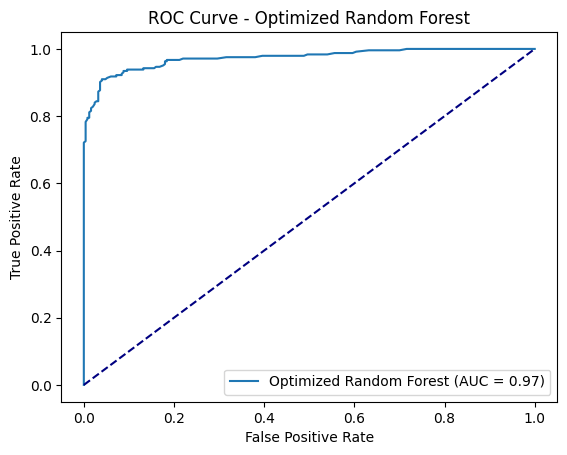

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_curve, auc, confusion_matrix, classification_report

# Confusion Matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.show()

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_best_rf)
kappa = cohen_kappa_score(y_test, y_pred_best_rf)
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_prob_best_rf)
roc_auc_best_rf = auc(fpr_best_rf, tpr_best_rf)

print(f'Optimized Random Forest Accuracy: {accuracy:.4f}')
print(f"Optimized Random Forest Cohen's Kappa: {kappa:.4f}")
print(classification_report(y_test, y_pred_best_rf))

# ROC Curve
plt.plot(fpr_best_rf, tpr_best_rf, label=f'Optimized Random Forest (AUC = {roc_auc_best_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized Random Forest')
plt.legend()
plt.show()


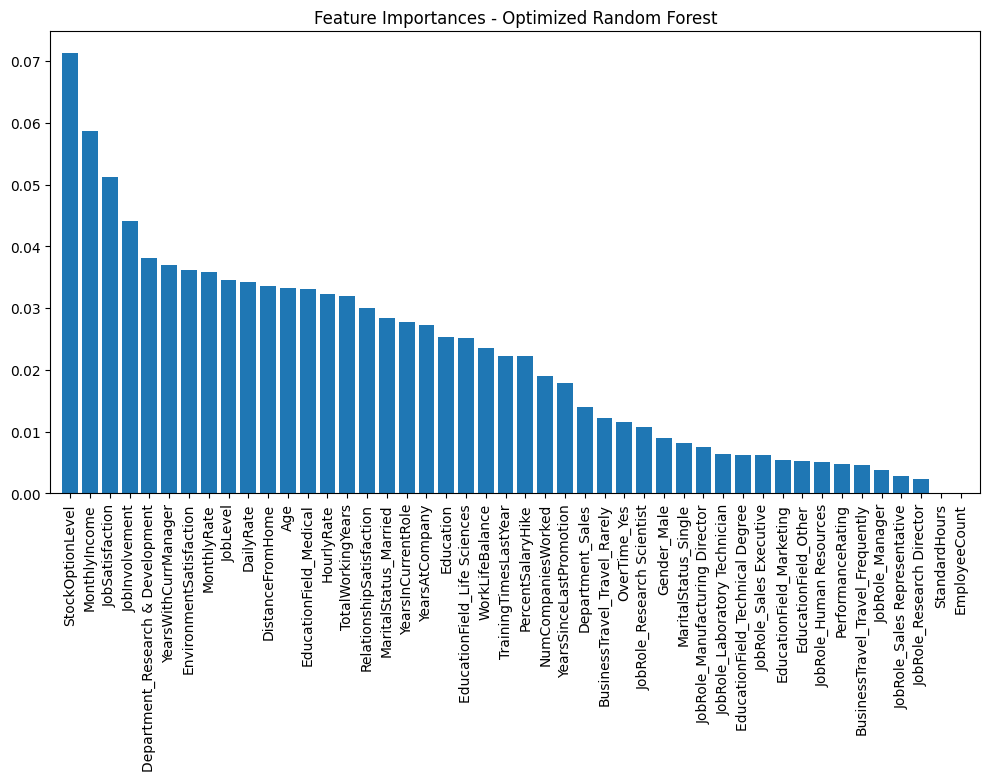

In [ ]:
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances - Optimized Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X, y, cv=5)
print("Cross-validated scores:", cv_scores)


Cross-validated scores: [0.85714286 0.85714286 0.86734694 0.8537415  0.86394558]


In [ ]:
import joblib
joblib.dump(best_rf_model, 'optimized_random_forest_model.pkl')


['optimized_random_forest_model.pkl']

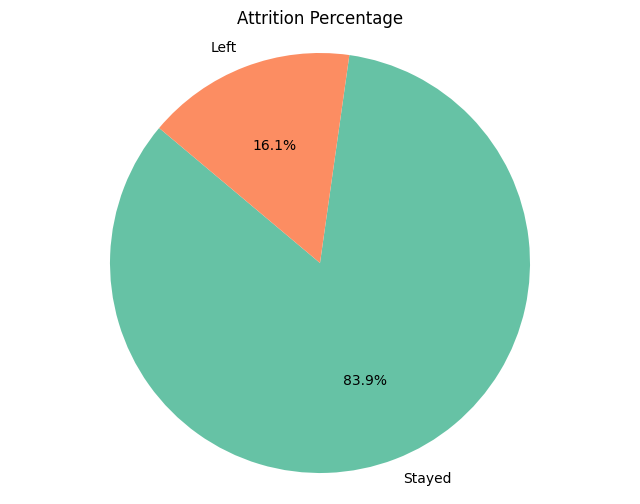

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Make sure the 'Attrition' column is in numerical format
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Count the occurrences of each class in the Attrition column
attrition_counts = df['Attrition'].value_counts()

# Create labels and colors for the pie chart
labels = ['Stayed', 'Left']  # You can customize these labels
colors = ['#66c2a5', '#fc8d62']  # Custom colors for each segment

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Attrition Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


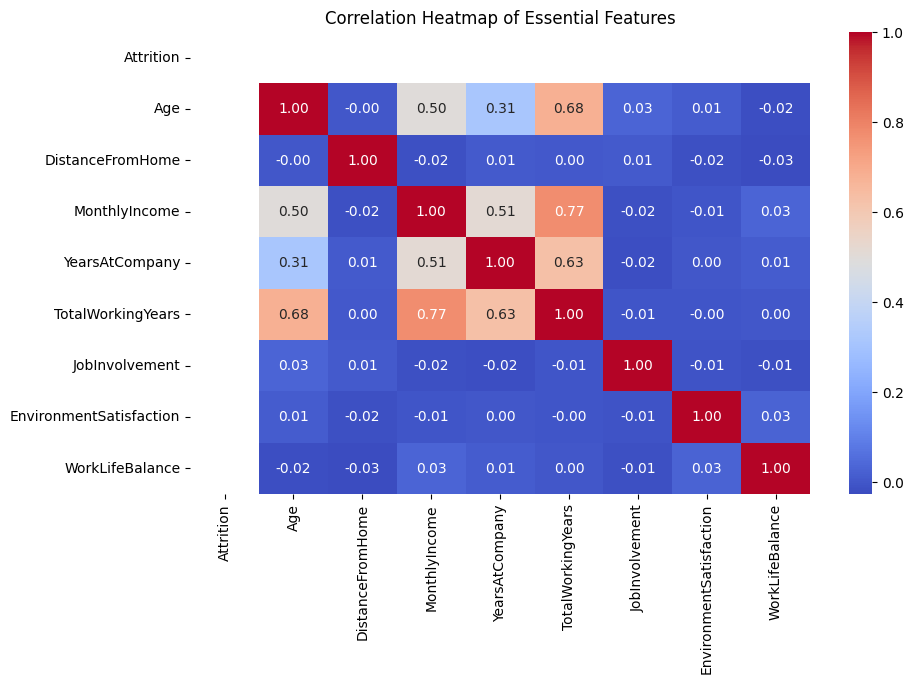

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you have already preprocessed it

# Convert 'Attrition' column to numerical representation
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Select essential features for the heatmap
essential_features = [
    'Attrition', 'Age', 'DistanceFromHome', 'MonthlyIncome',
    'YearsAtCompany', 'TotalWorkingYears', 'JobInvolvement',
    'EnvironmentSatisfaction', 'WorkLifeBalance'  # Add or modify as needed
]

# Create a subset of the DataFrame with essential features
df_essential = df[essential_features]

# Now create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_essential.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Essential Features')
plt.show()


In [ ]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('optimized_random_forest_model.pkl')  # Assuming the model is saved in 'optimized_random_forest_model.pkl'

# Make predictions
predictions = model.predict(X_test)

# Convert predictions to a DataFrame for easier handling
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Attrition'])

# Display at least 20 predicted values
print(predictions_df.head(20))

    Predicted_Attrition
0                     0
1                     0
2                     0
3                     1
4                     1
5                     1
6                     1
7                     1
8                     0
9                     0
10                    0
11                    1
12                    0
13                    0
14                    1
15                    0
16                    0
17                    0
18                    1
19                    0


In [ ]:
# Assuming you have actual labels for your test set
actual_labels = y_test  # This should be your actual test labels

# Combine predictions with actual labels for comparison
results_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predictions})
print(results_df.head(20))


    Actual  Predicted
0        0          0
1        1          0
2        0          0
3        1          1
4        1          1
5        1          1
6        1          1
7        0          1
8        0          0
9        1          0
10       0          0
11       1          1
12       0          0
13       0          0
14       1          1
15       0          0
16       0          0
17       0          0
18       1          1
19       0          0


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

# Load the model
loaded_model = joblib.load('random_forest_model.pkl')
